### Customer churn prediction: Telecom Churn Dataset

Customer churn, also known as customer retention, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from imblearn.over_sampling import SMOTE 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier

In [13]:
train=pd.read_csv(r"C:\Users\MADHU\Downloads\churn customer prediction dataset\train.csv")
test=pd.read_csv(r"C:\Users\MADHU\Downloads\churn customer prediction dataset\test.csv")

In [14]:
train.shape

(4250, 20)

In [15]:
test.shape

(750, 20)

In [16]:
train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

### Univariate Analysis

In [18]:
# Storing all the categorical features
categorical_variables=[]
categorical_variables=[feature for feature in train.columns if train[feature].dtype=="O"]


In [19]:
# Function to calculate percentage for each feature:-
def calculate_percentage(total, ax):
    for patch in ax.patches:
        percentage="{}%".format(round(100*(patch.get_height()/total),1))
        x=patch.get_x()+(patch.get_width()/2)
        y=patch.get_height()
        ax.annotate(percentage, (x, y), ha="center")


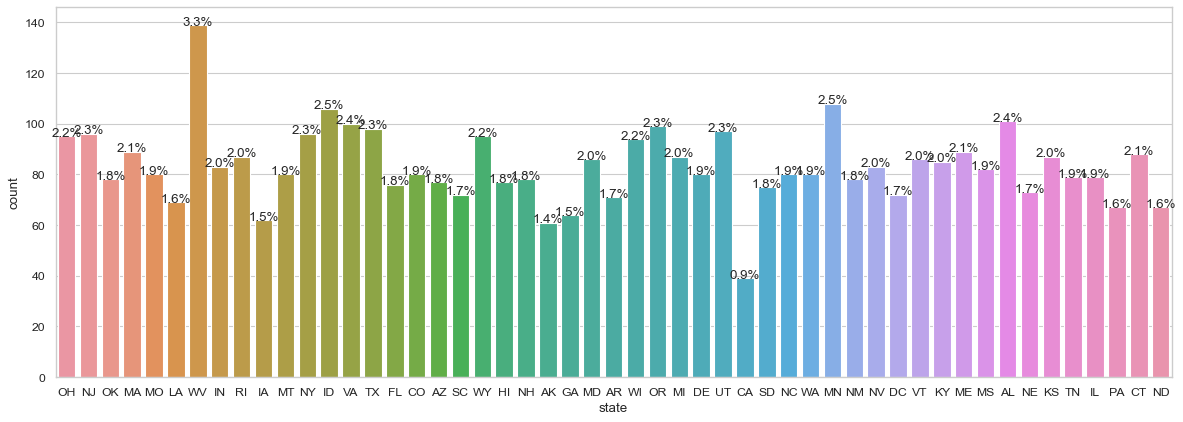

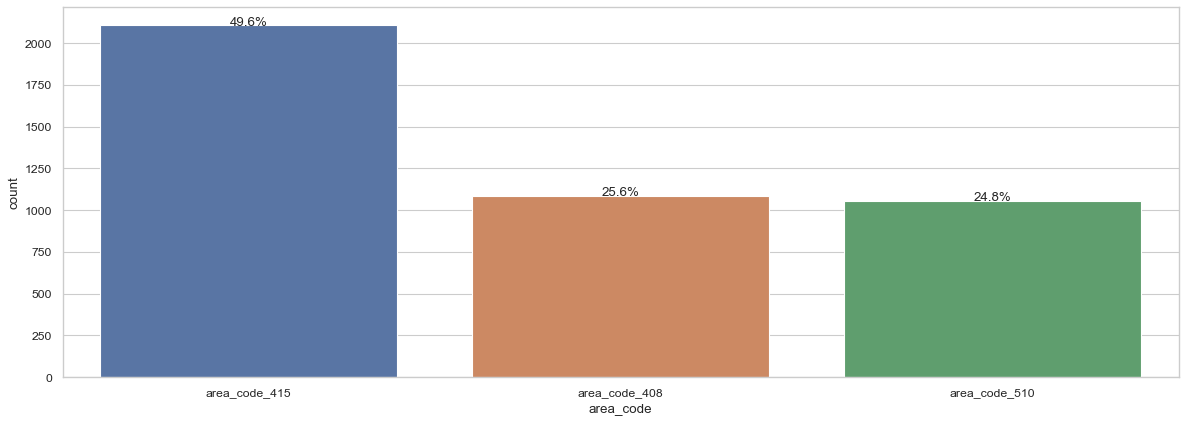

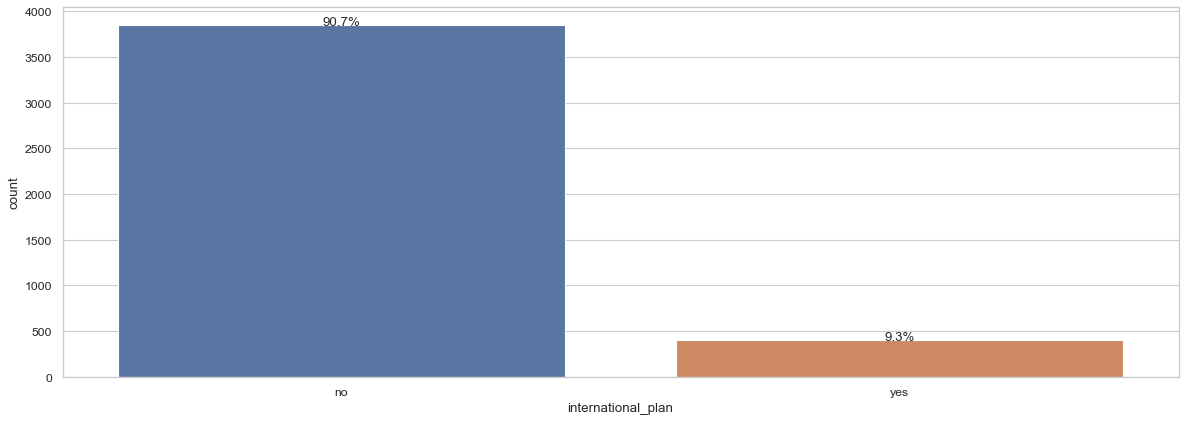

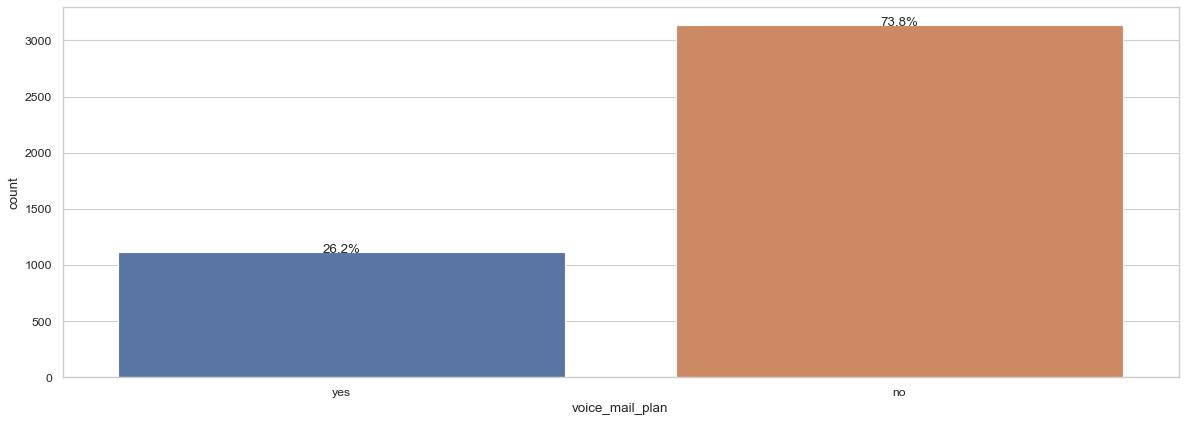

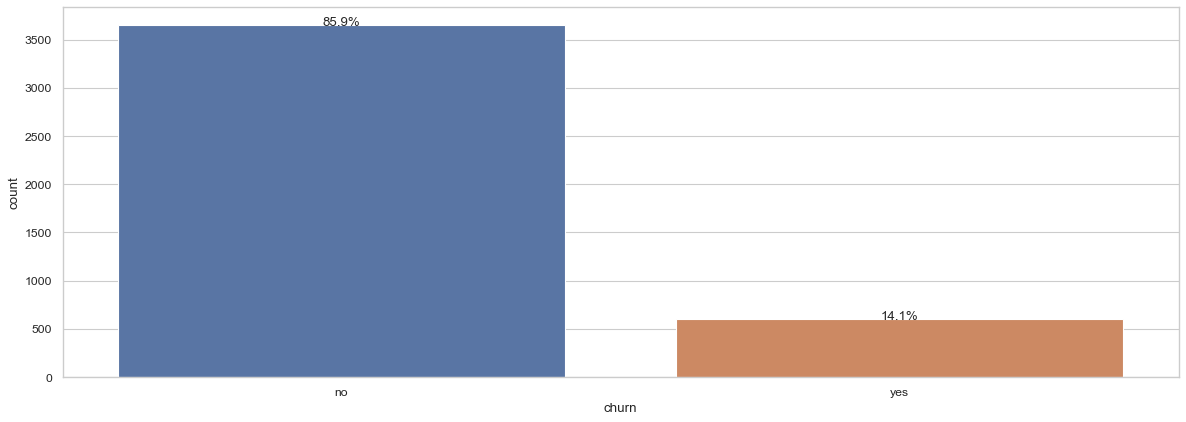

In [20]:
# Plotting countplot for each categorical variable by using the above function:-
for feature in categorical_variables:
    sns.set(style="whitegrid")
    plt.figure(figsize=(18,6), dpi=80)
    total=len(train)
    ax=sns.countplot(x=train[feature], data=train)
    calculate_percentage(total, ax)
    plt.show()

C:\Users\MADHU\AppData\Local\Temp\ipykernel_4612\1525970604.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


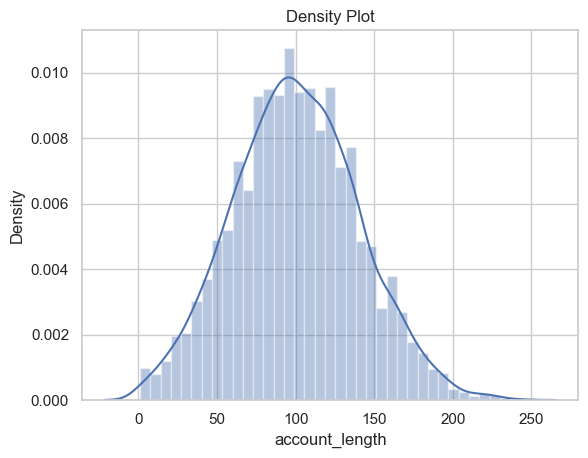

C:\Users\MADHU\AppData\Local\Temp\ipykernel_4612\1525970604.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


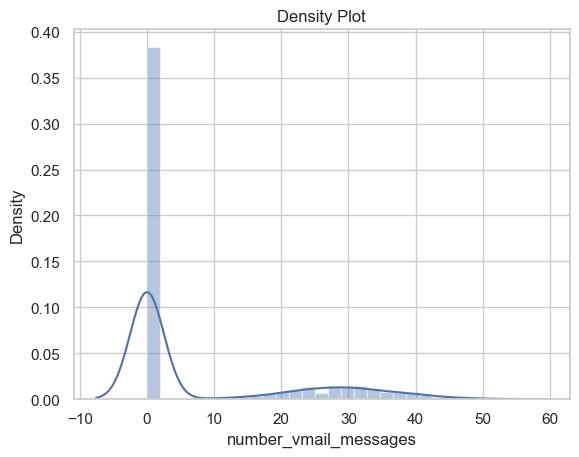

C:\Users\MADHU\AppData\Local\Temp\ipykernel_4612\1525970604.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


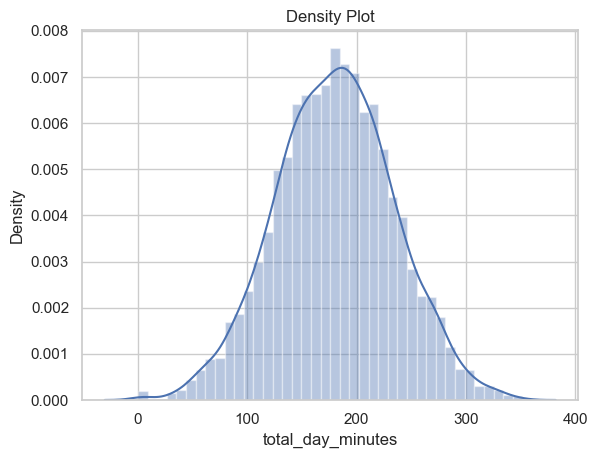

C:\Users\MADHU\AppData\Local\Temp\ipykernel_4612\1525970604.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


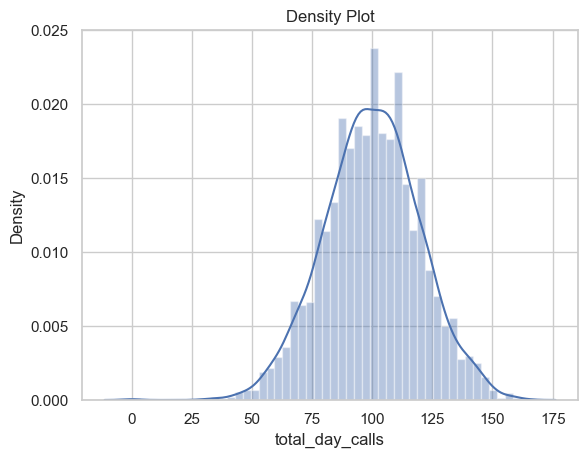

C:\Users\MADHU\AppData\Local\Temp\ipykernel_4612\1525970604.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


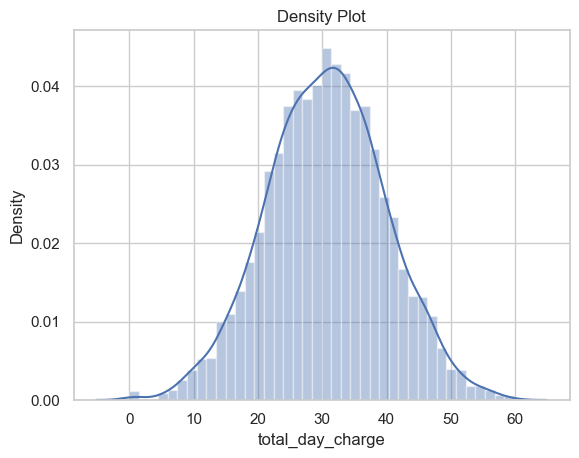

C:\Users\MADHU\AppData\Local\Temp\ipykernel_4612\1525970604.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


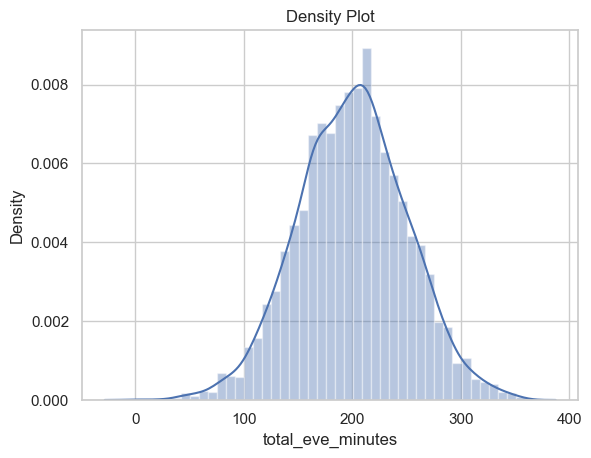

C:\Users\MADHU\AppData\Local\Temp\ipykernel_4612\1525970604.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


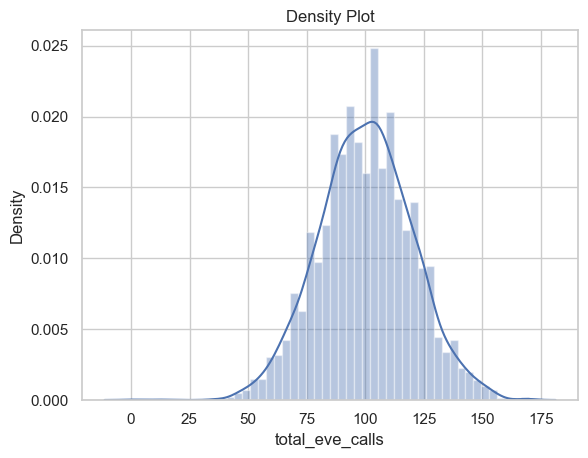

C:\Users\MADHU\AppData\Local\Temp\ipykernel_4612\1525970604.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


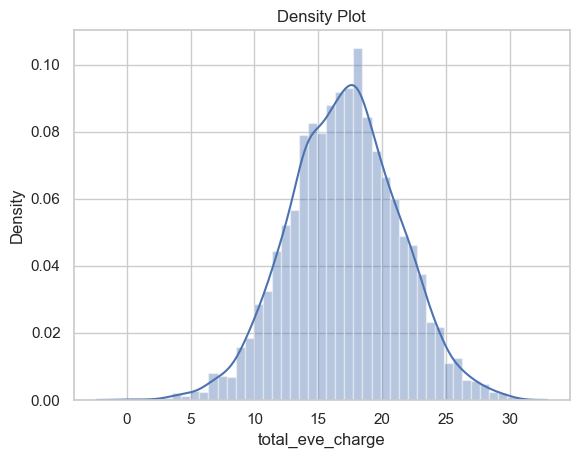

C:\Users\MADHU\AppData\Local\Temp\ipykernel_4612\1525970604.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


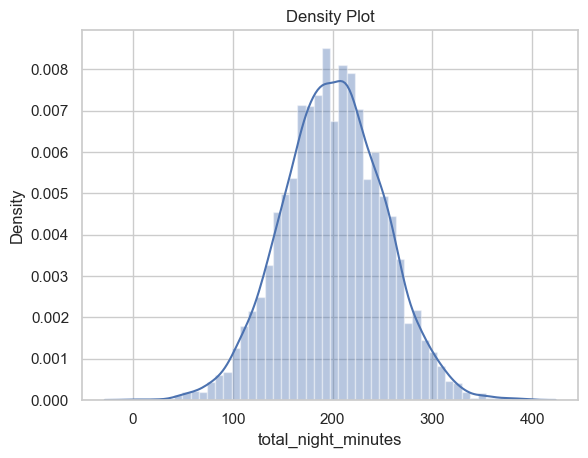

C:\Users\MADHU\AppData\Local\Temp\ipykernel_4612\1525970604.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


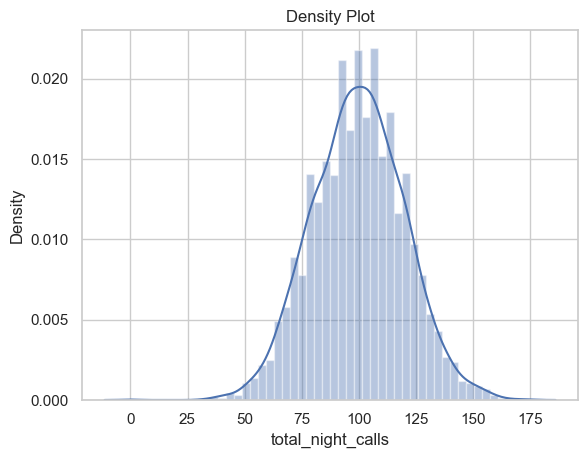

C:\Users\MADHU\AppData\Local\Temp\ipykernel_4612\1525970604.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


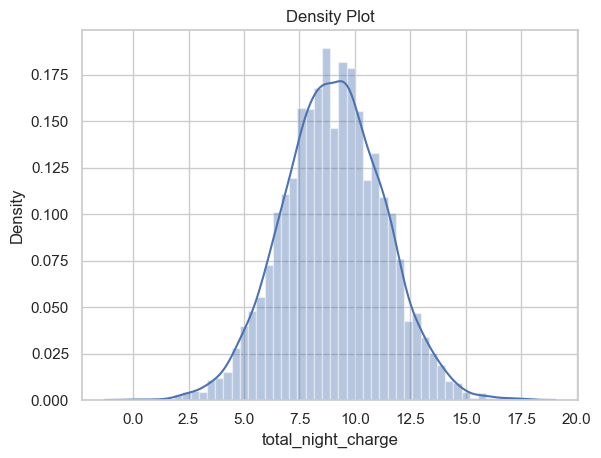

C:\Users\MADHU\AppData\Local\Temp\ipykernel_4612\1525970604.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


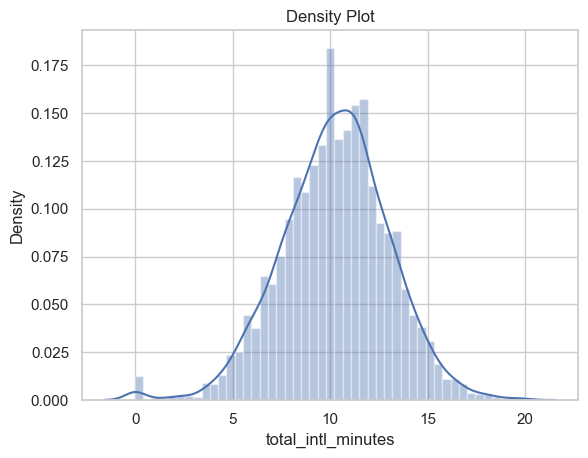

C:\Users\MADHU\AppData\Local\Temp\ipykernel_4612\1525970604.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


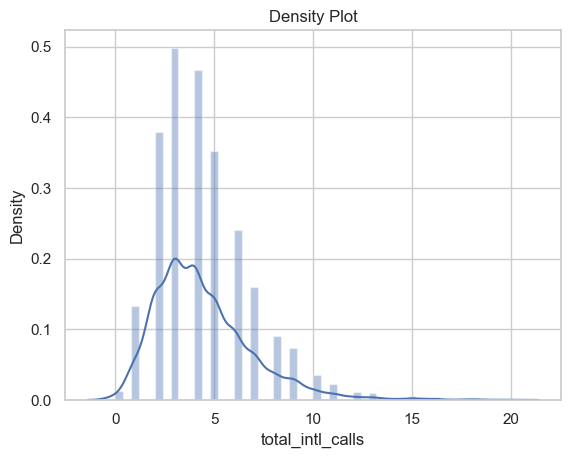

C:\Users\MADHU\AppData\Local\Temp\ipykernel_4612\1525970604.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


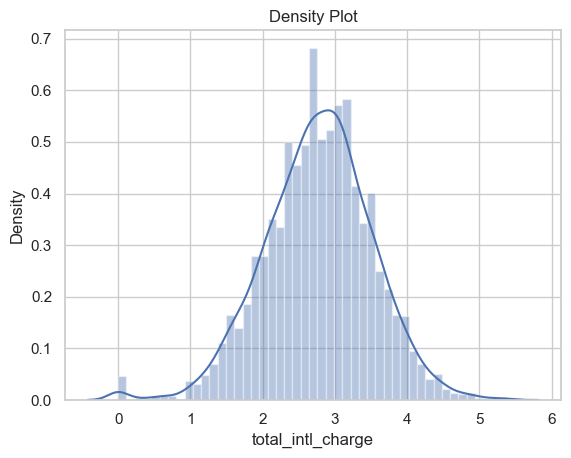

C:\Users\MADHU\AppData\Local\Temp\ipykernel_4612\1525970604.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


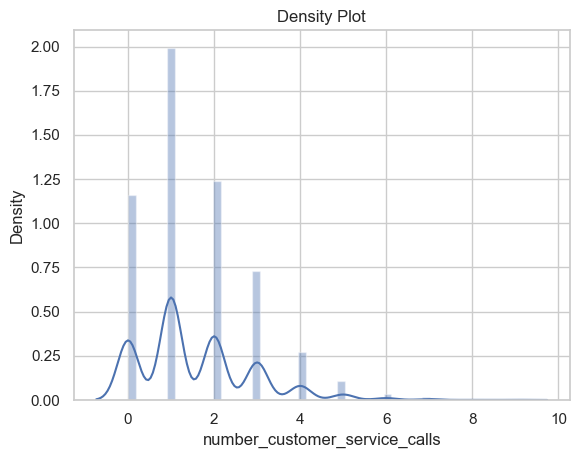

In [21]:
# Storing all the numerical features
numerical_variables=[]
numerical_variables=[feature for feature in train.columns if train[feature].dtype!="O"]

# Plotting Density plots for each numerical variable by using the above function:

for feature in numerical_variables:
    sns.distplot(train[feature])
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.title("Density Plot")
    plt.show()

### Bivariate Analysis 

E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*pl

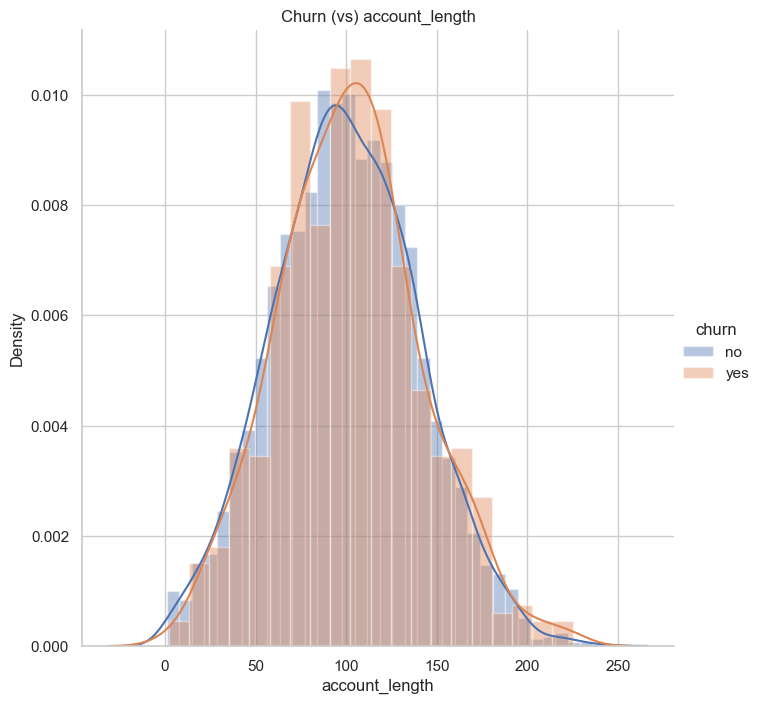

In [22]:
sns.FacetGrid(train, hue="churn", height=7).map(sns.distplot, "account_length").add_legend()
plt.title("Churn (vs) account_length")
plt.show()

### From above it is clear that if "Account Length" is between 90 to 110 months, churn rate is high.

E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*pl

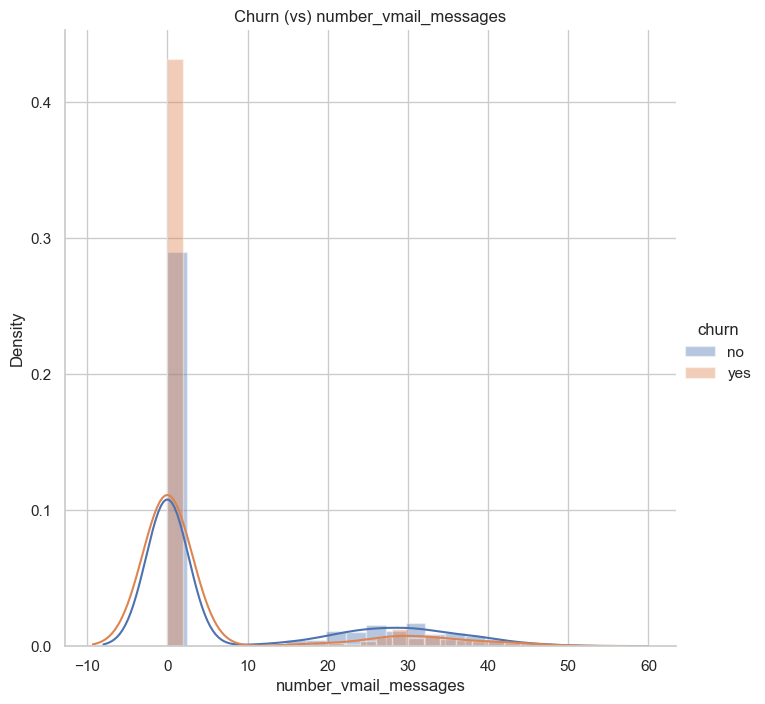

In [23]:
sns.FacetGrid(train, hue="churn", height=7).map(sns.distplot, "number_vmail_messages").add_legend()
plt.title("Churn (vs) number_vmail_messages")
plt.show()

### From above it is clear that if "Number of voice mail messages" is equal to 0, churn rate is very high.


E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*pl

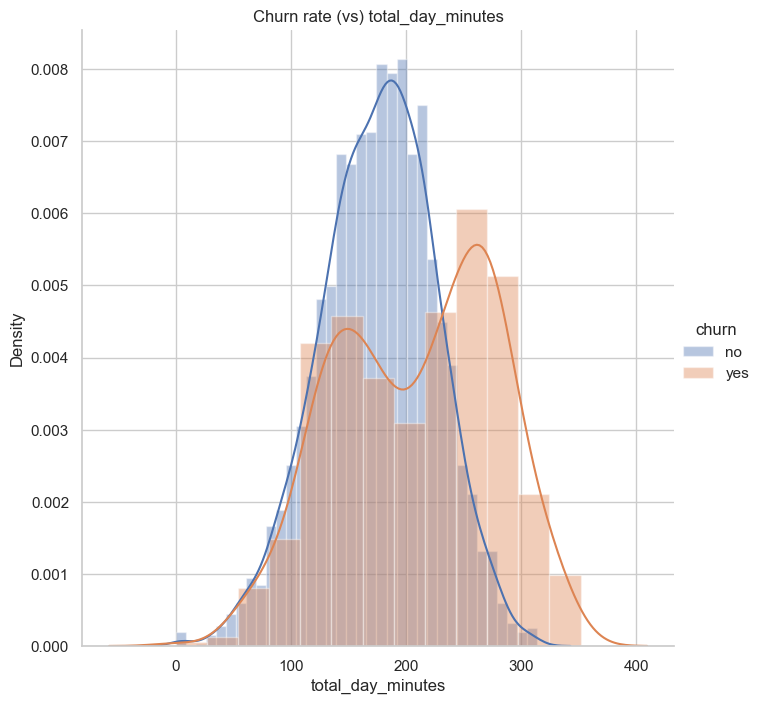

In [24]:
sns.FacetGrid(train, hue="churn", height=7).map(sns.distplot, "total_day_minutes").add_legend()
plt.title("Churn rate (vs) total_day_minutes")
plt.show()

### From above it is clear that if "The total day minutes" is around 220 to 300 minutes then the churn rate is high.

E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*pl

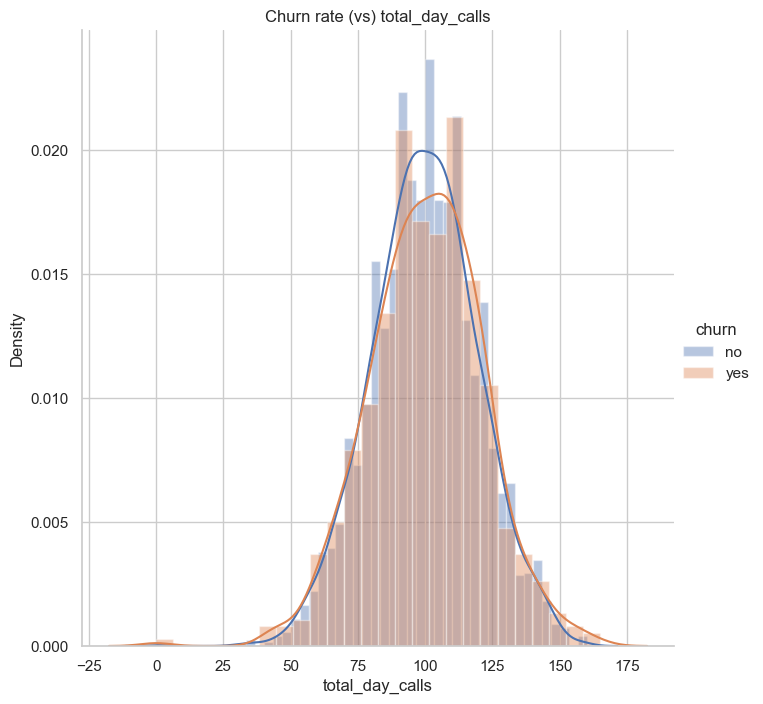

In [25]:
sns.FacetGrid(train, hue="churn", height=7).map(sns.distplot, "total_day_calls").add_legend()
plt.title("Churn rate (vs) total_day_calls")
plt.show()

### From above it is clear that if "The total day calls" is between 85 to 115 times then the churn rate is high

E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*pl

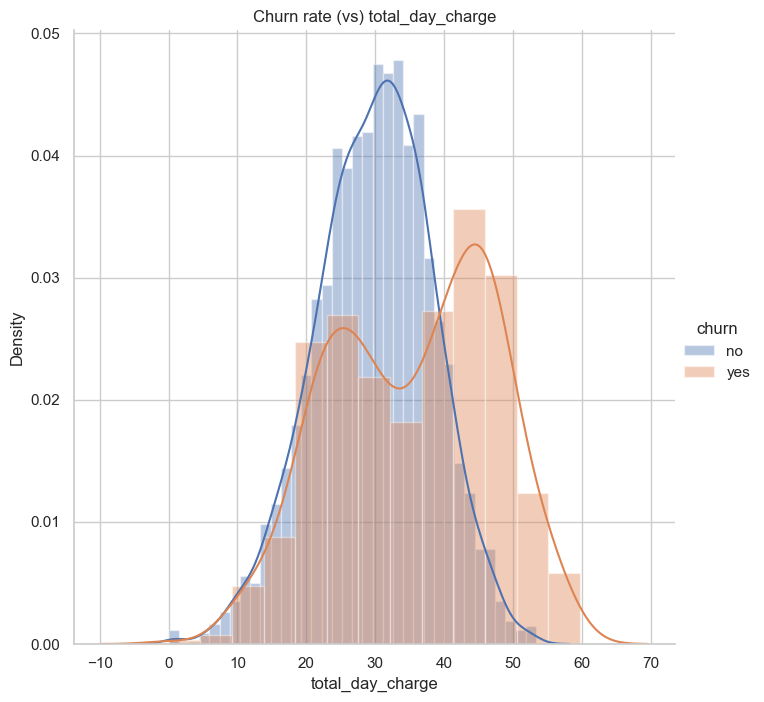

In [26]:
sns.FacetGrid(train, hue="churn", height=7).map(sns.distplot, "total_day_charge").add_legend()
plt.title("Churn rate (vs) total_day_charge")
plt.show()

### From above it is clear that if "The total day charges" is between 42 to 48 then the churn rate is high.


E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*pl

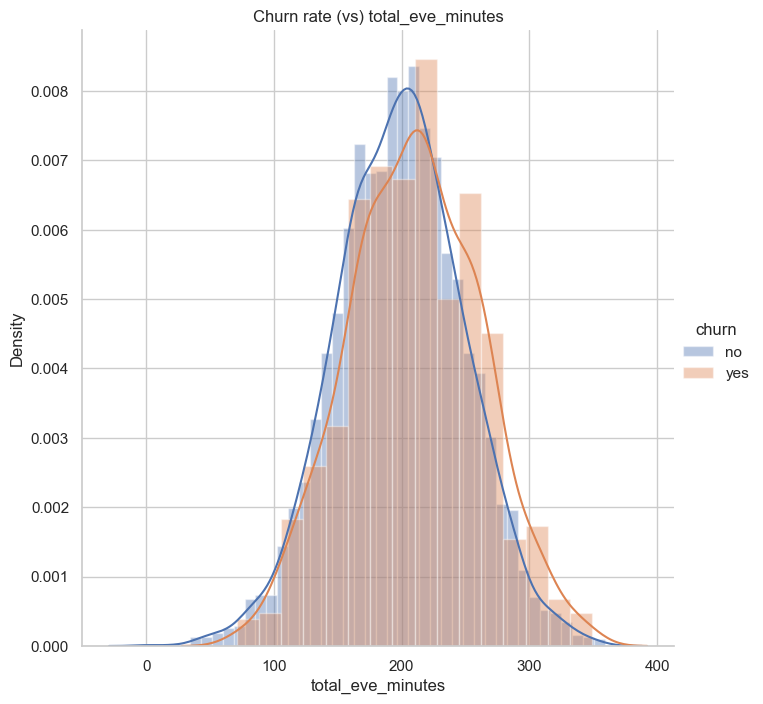

In [27]:
sns.FacetGrid(train, hue="churn", height=7).map(sns.distplot, "total_eve_minutes").add_legend()
plt.title("Churn rate (vs) total_eve_minutes")
plt.show()

### From above it is clear that if "The total evening minutes" is between 200 to 250 minutes then the churn rate is high.

E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*pl

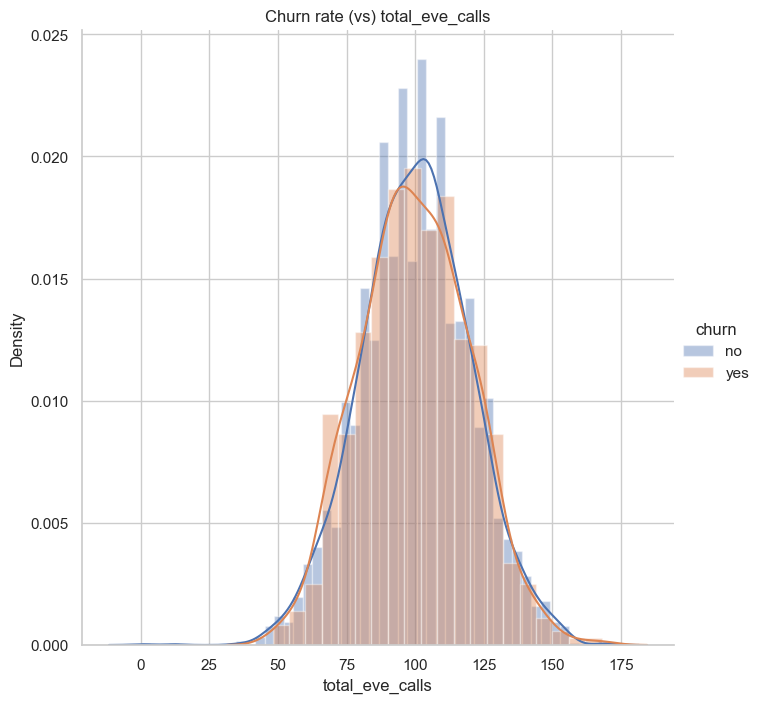

In [28]:
sns.FacetGrid(train, hue="churn", height=7).map(sns.distplot, "total_eve_calls").add_legend()
plt.title("Churn rate (vs) total_eve_calls")
plt.show()

### From above it is clear thar if "The total evening calls" is between 80 to 110 times then the churn rate is high.

E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*pl

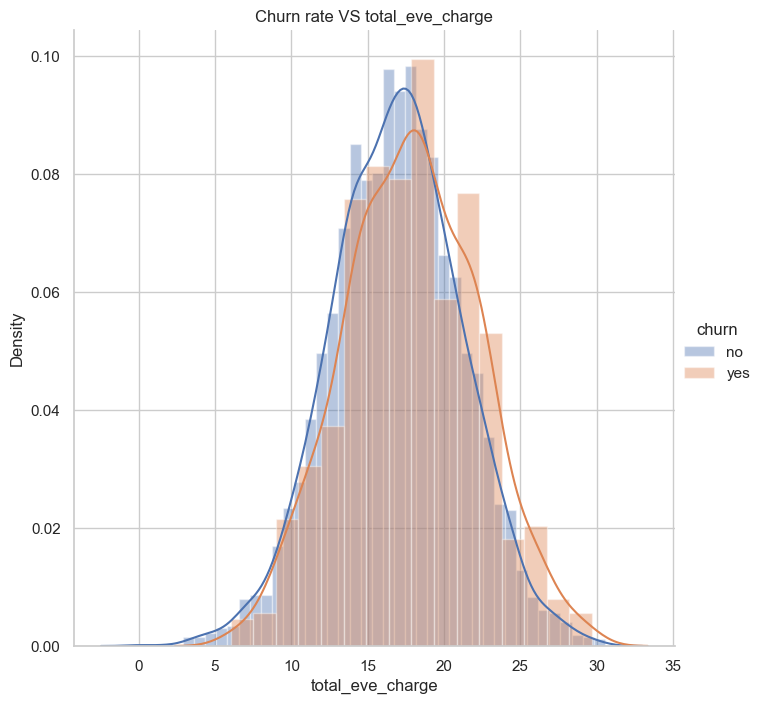

In [29]:
sns.FacetGrid(train, hue='churn',height=7).map(sns.distplot, 'total_eve_charge').add_legend()
plt.title('Churn rate VS total_eve_charge')
plt.show()

### From above it is clear thar if "The total evening charges" is between 17 to 22 then the churn rate is high.

E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*pl

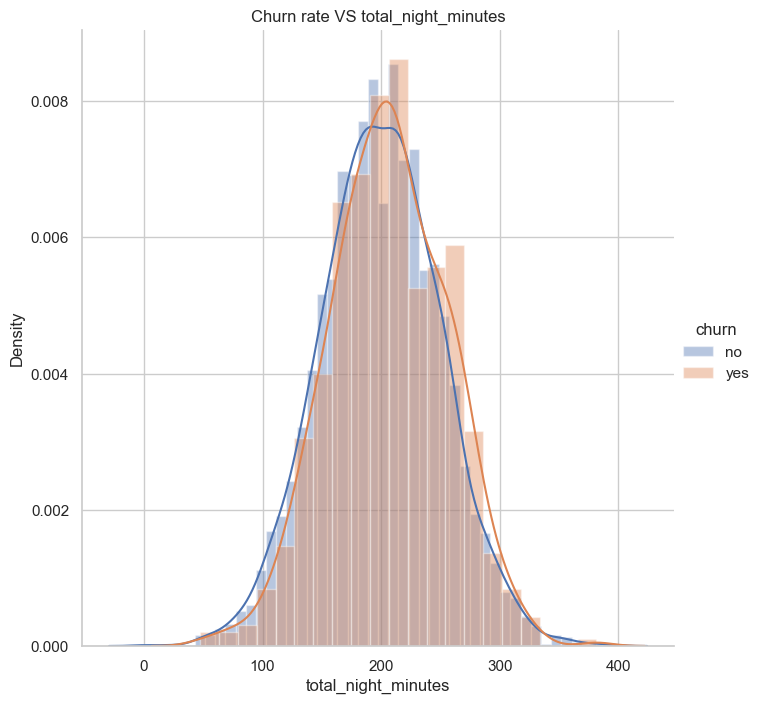

In [30]:
sns.FacetGrid(train, hue='churn',height=7).map(sns.distplot, 'total_night_minutes').add_legend()
plt.title('Churn rate VS total_night_minutes')
plt.show()

### From above it is clear thar if "The total night minutes" is between 180 to 220 then the churn rate is high.

E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*pl

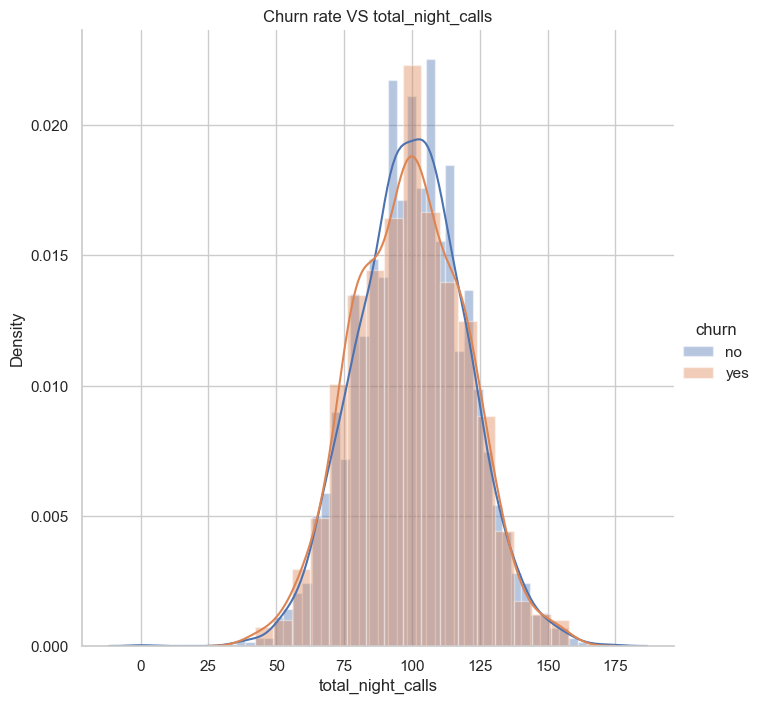

In [31]:
sns.FacetGrid(train, hue='churn',height=7).map(sns.distplot, 'total_night_calls').add_legend()
plt.title('Churn rate VS total_night_calls')
plt.show()

### From above it is clear thar if "The total night calls" is between 90 to 110 then the churn rate is high.

E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*pl

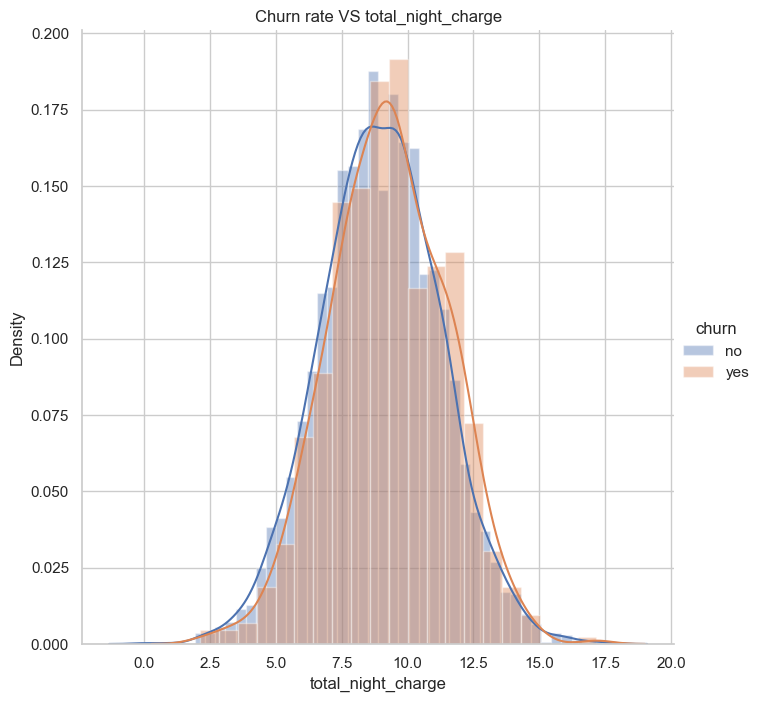

In [32]:
sns.FacetGrid(train, hue='churn',height=7).map(sns.distplot, 'total_night_charge').add_legend()
plt.title('Churn rate VS total_night_charge')
plt.show()

### From above it is clear thar if "The total night charges" is between 8 to 11 then the churn rate is high.

E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*pl

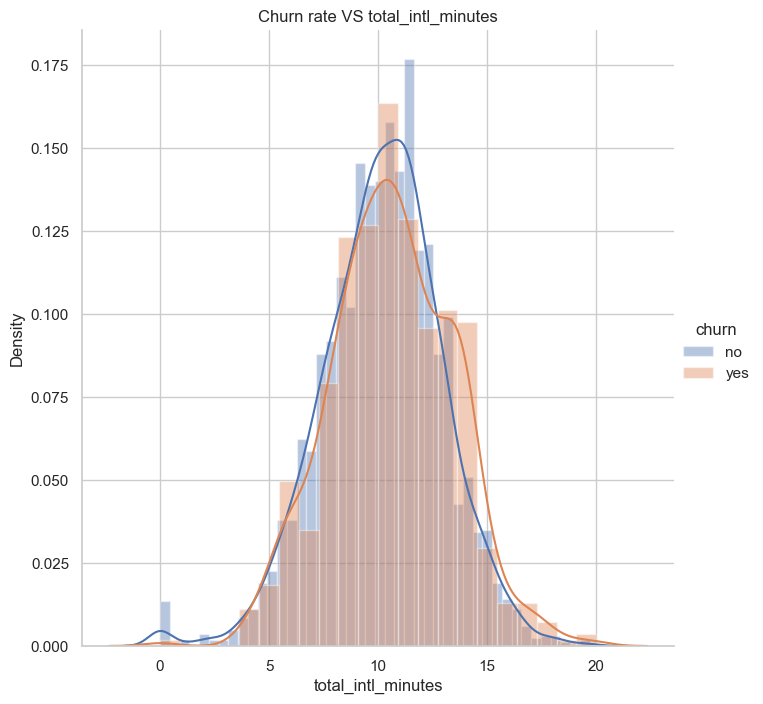

In [33]:
sns.FacetGrid(train, hue="churn", height=7).map(sns.distplot, "total_intl_minutes").add_legend()
plt.title("Churn rate VS total_intl_minutes")
plt.show()

### From above it is clear thar if "The total international minutes" is between 8 to 12 then the churn rate is high

E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*pl

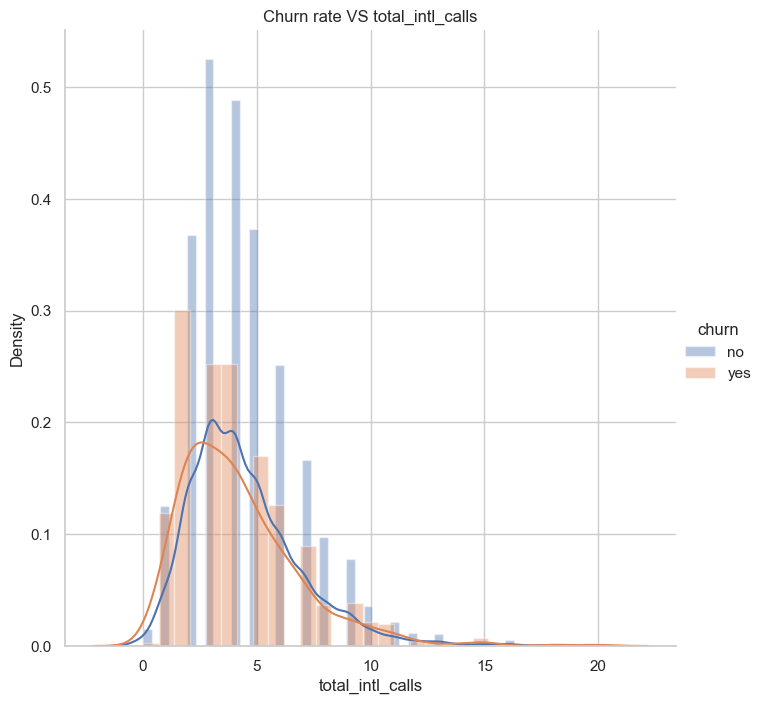

In [34]:
sns.FacetGrid(train, hue="churn", height=7).map(sns.distplot, "total_intl_calls").add_legend()
plt.title("Churn rate VS total_intl_calls")
plt.show()

### From above it is clear thar if "The total international calls" is between 2 to 4 then the churn rate is high

E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*pl

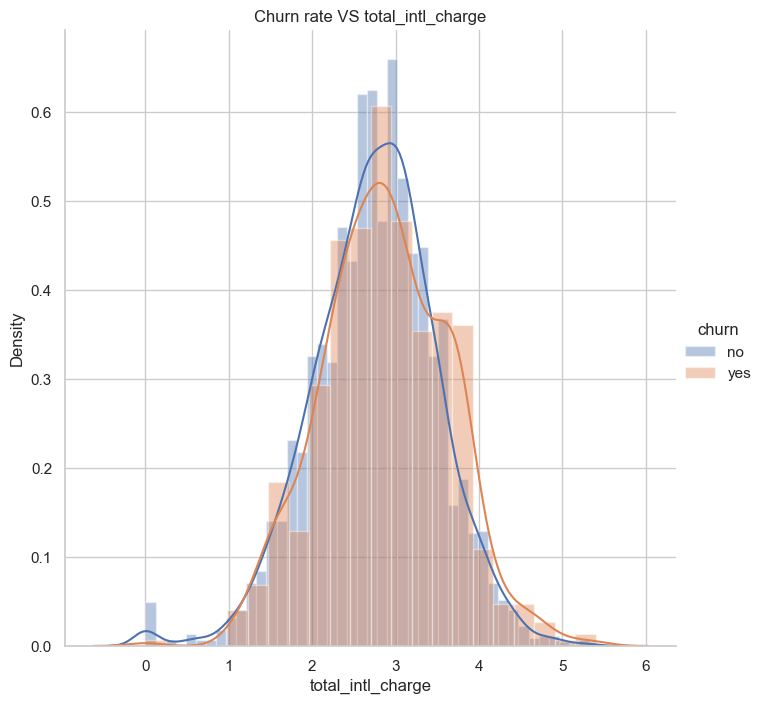

In [35]:
sns.FacetGrid(train, hue="churn", height=7).map(sns.distplot, "total_intl_charge").add_legend()
plt.title("Churn rate VS total_intl_charge")
plt.show()

### From above it is clear thar if "The total international charge" is between 2.5 to 3 then the churn rate is high.

E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\Anaconda_python_programfiles\envs\tensorflow_new\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*pl

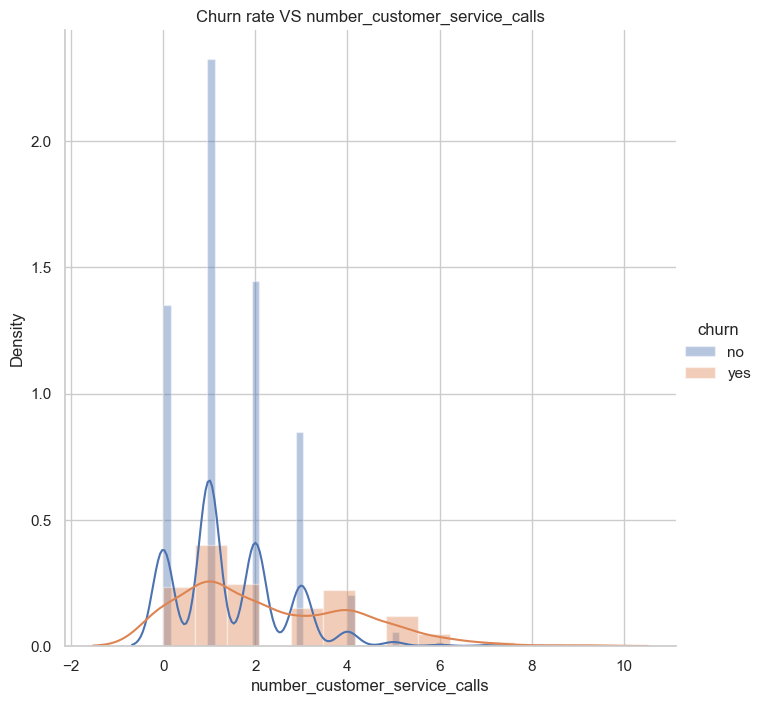

In [36]:
sns.FacetGrid(train, hue="churn", height=7).map(sns.distplot, "number_customer_service_calls").add_legend()
plt.title("Churn rate VS number_customer_service_calls")
plt.show()

### From above it is clear thar if "The number of customer service calls" is 1 then the churn rate is high.

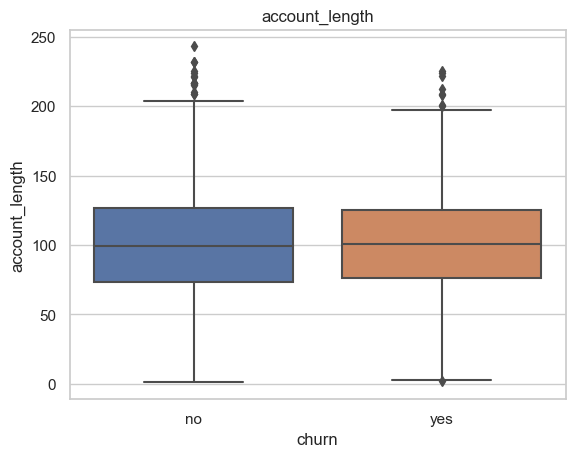

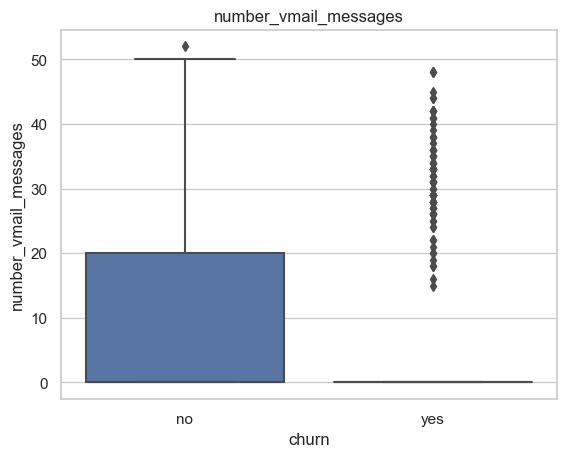

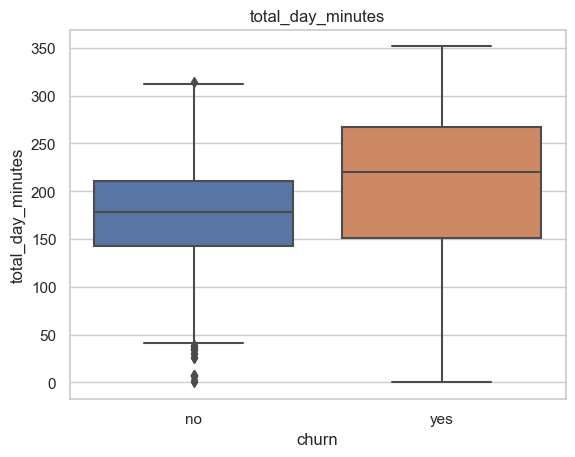

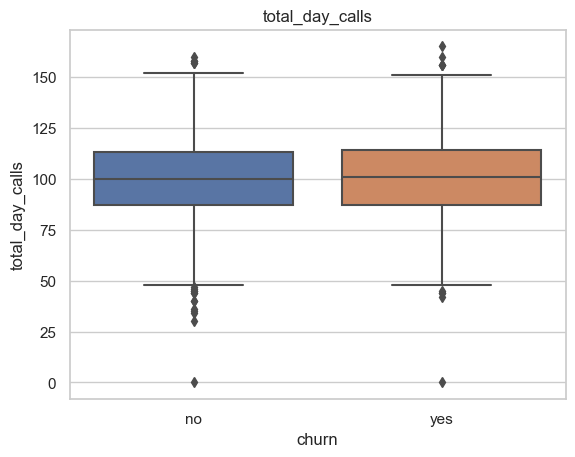

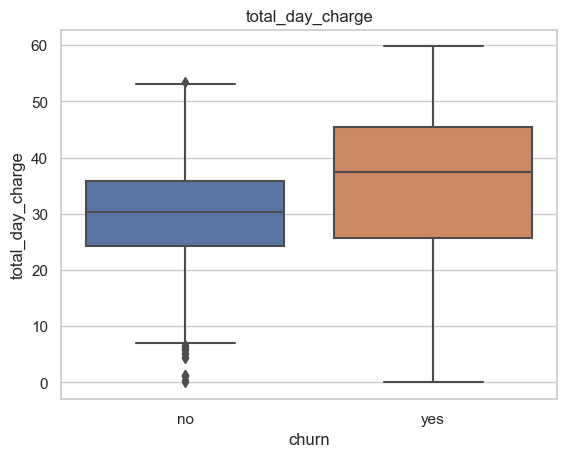

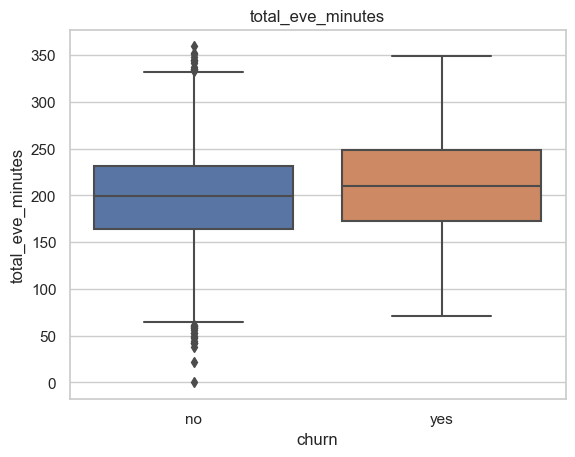

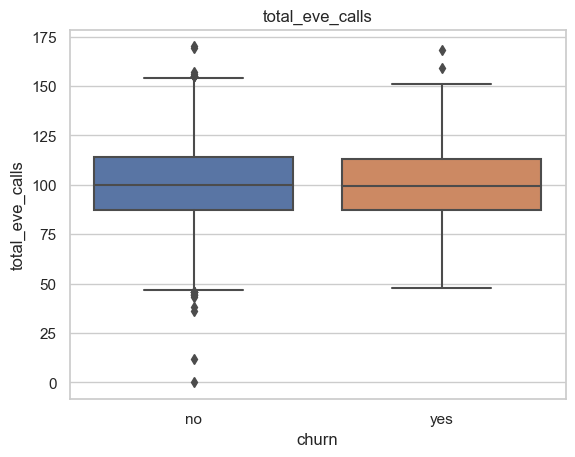

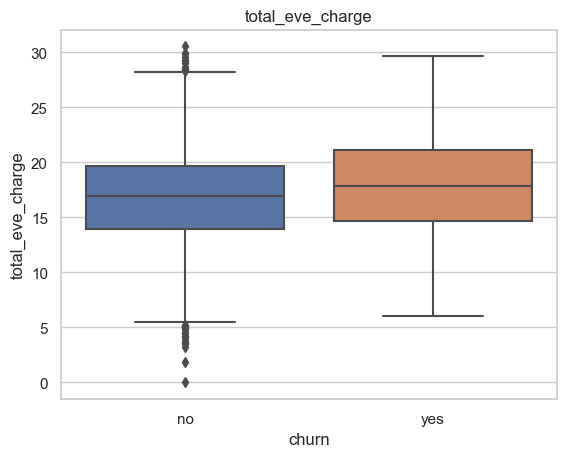

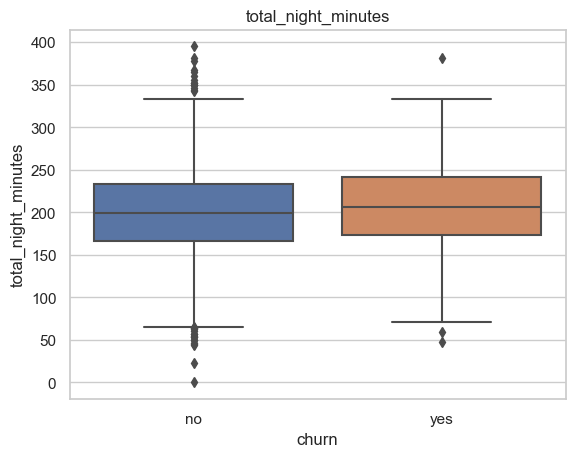

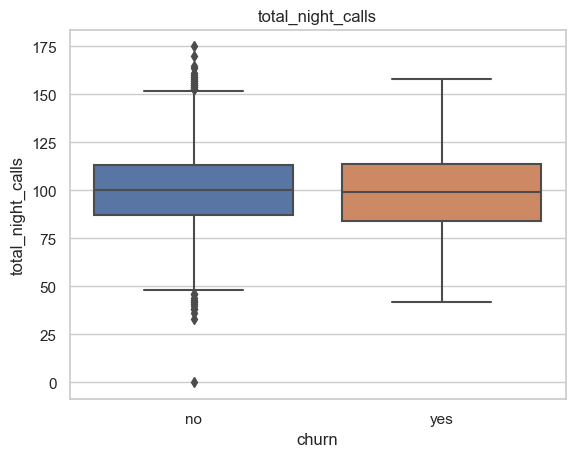

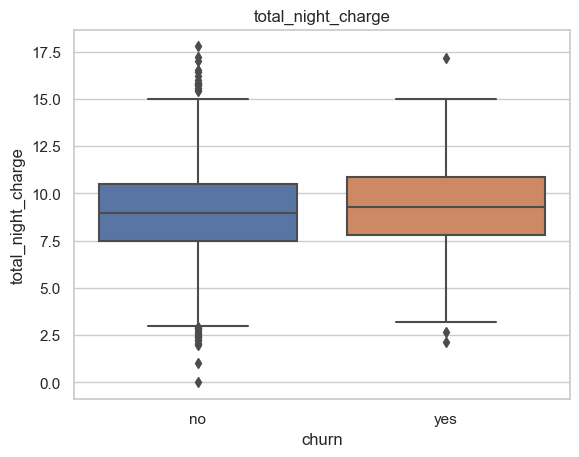

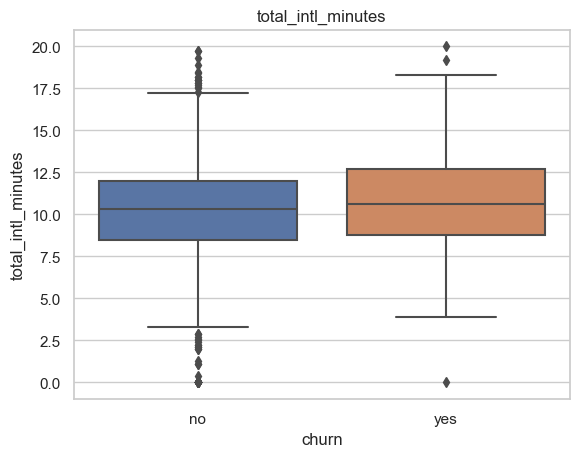

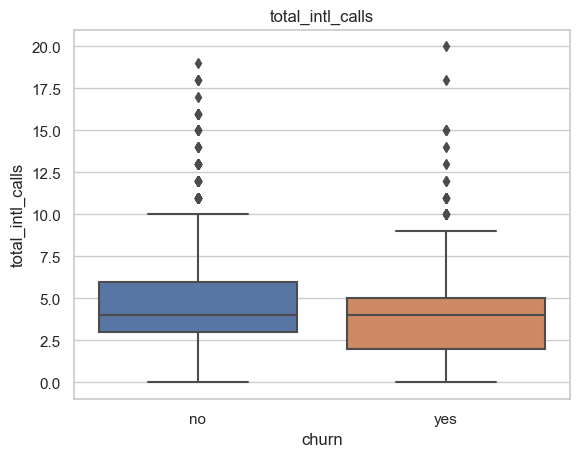

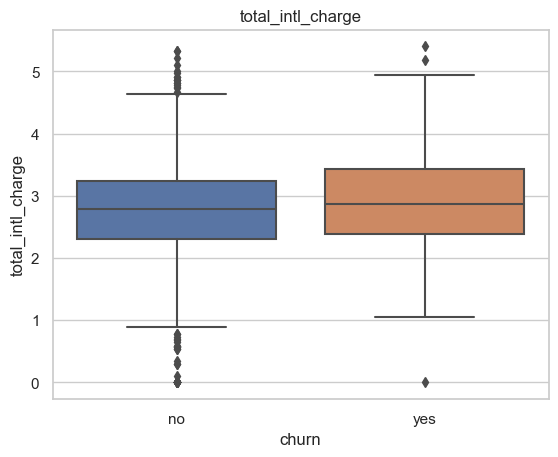

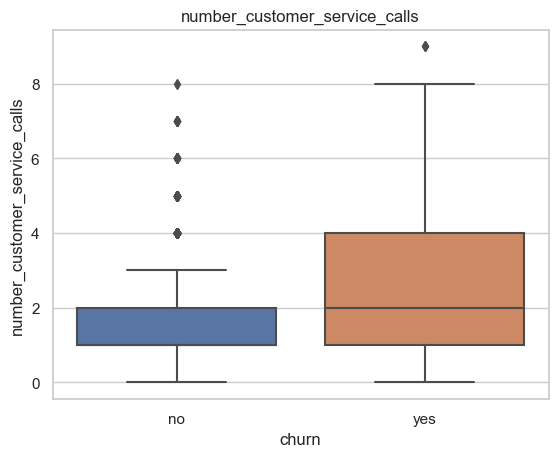

In [37]:
# finding outliers
# Numerical features 

for feature in numerical_variables:
    sns.boxplot(x="churn", y=feature, data=train)
    plt.title(feature)
    plt.show()

In [38]:
# Replacing the outliers with their median values and storing it in a new DataFrame:- 
def eliminate_outliers(df, labels):
    for feature in labels:
        quantile1=df[feature].quantile(0.25)
        quantile2=df[feature].quantile(0.75)
        
        iqr=quantile2 - quantile1;
        upper_bound=quantile2 + 1.5*iqr
        lower_bound=quantile1 - 1.5*iqr
        
        df[feature]=df[feature].mask(df[feature]<lower_bound, df[feature].median(), axis=0)
        df[feature]=df[feature].mask(df[feature]>upper_bound, df[feature].median(), axis=0)
        
    return df

train_eliminate_outliers=eliminate_outliers(train, numerical_variables)

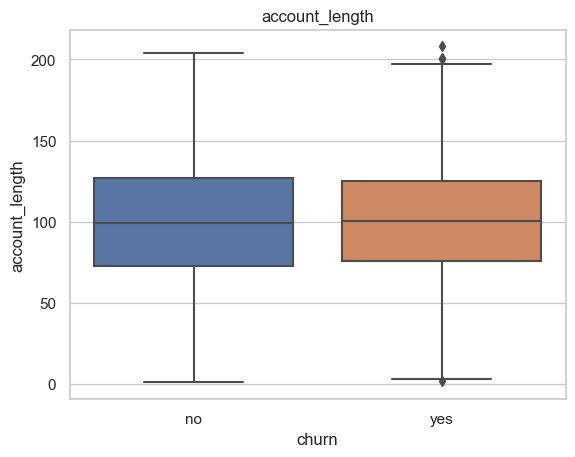

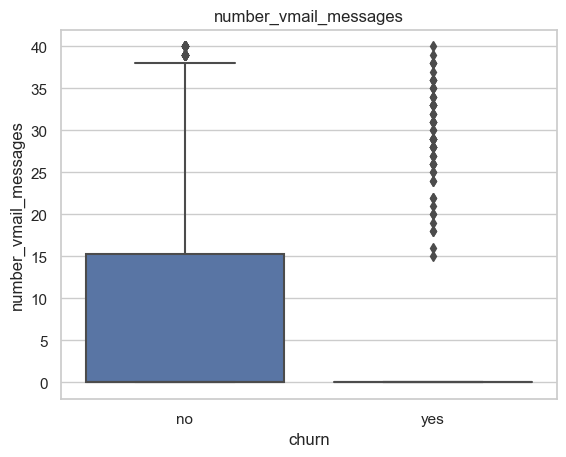

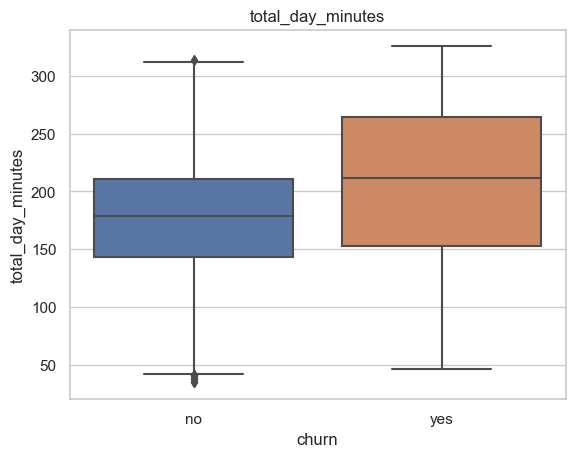

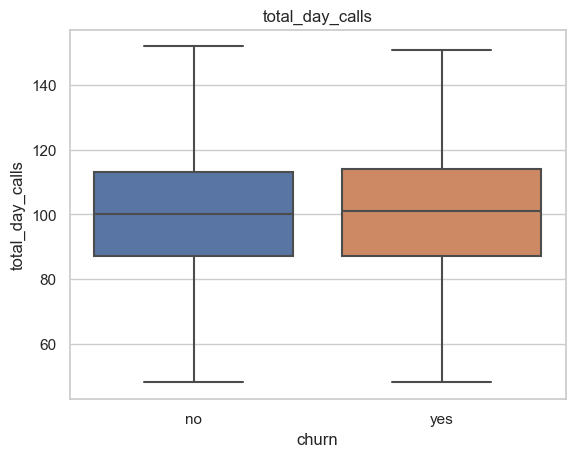

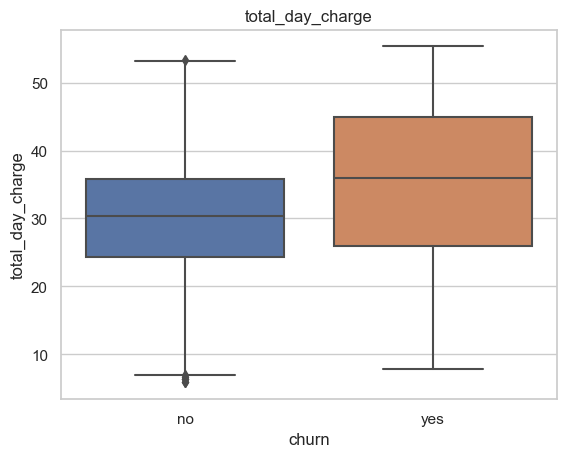

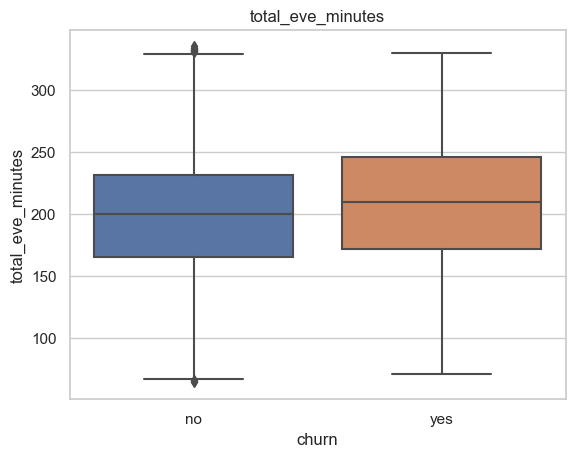

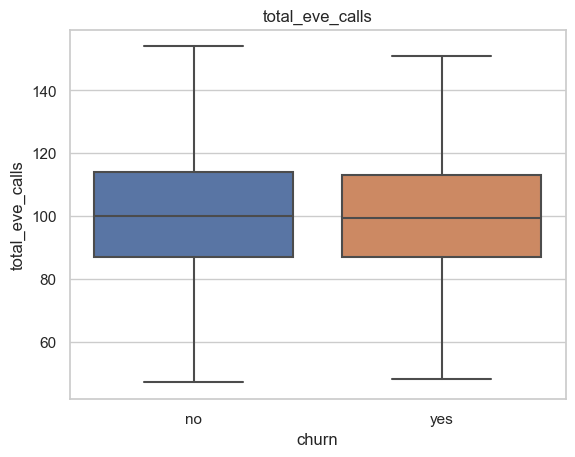

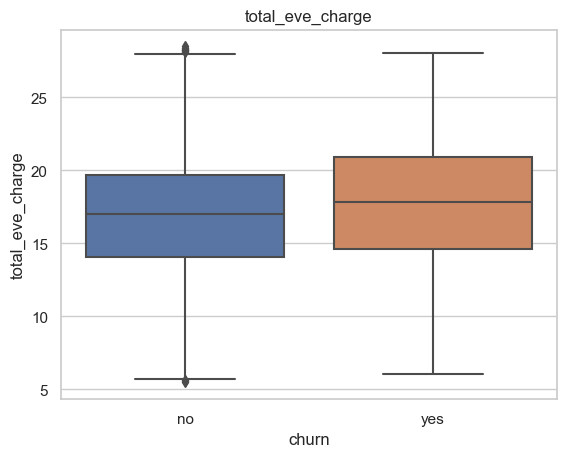

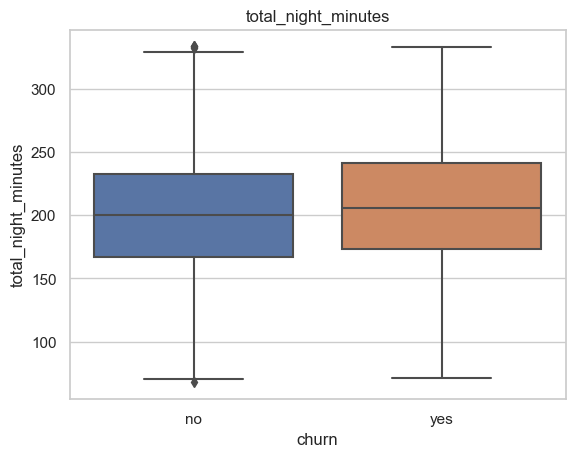

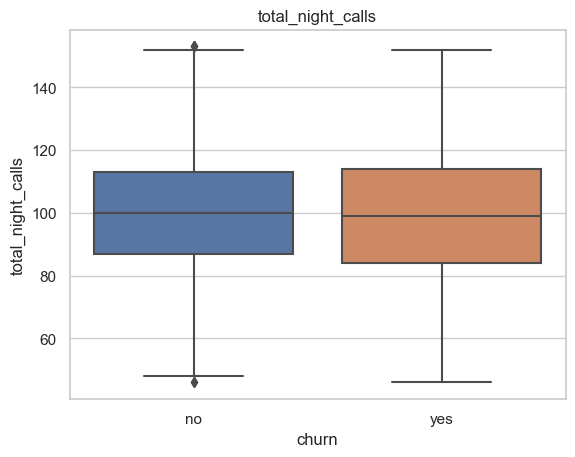

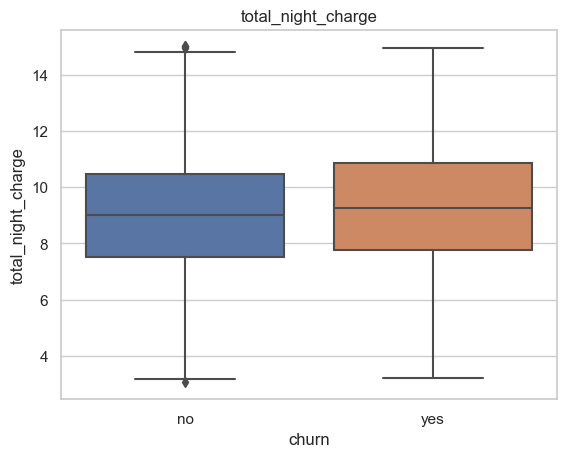

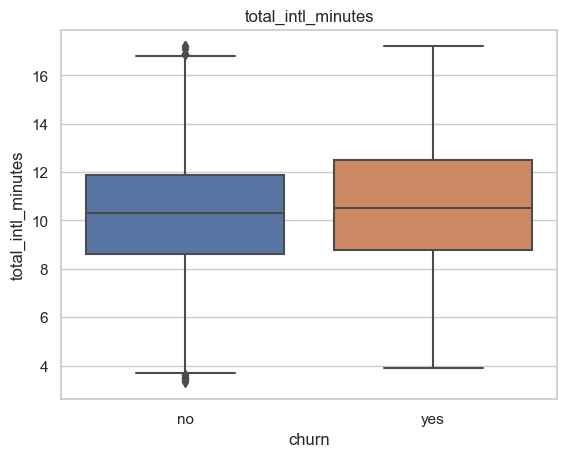

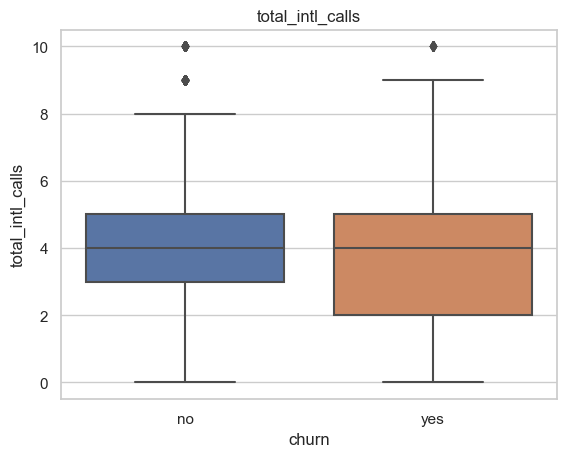

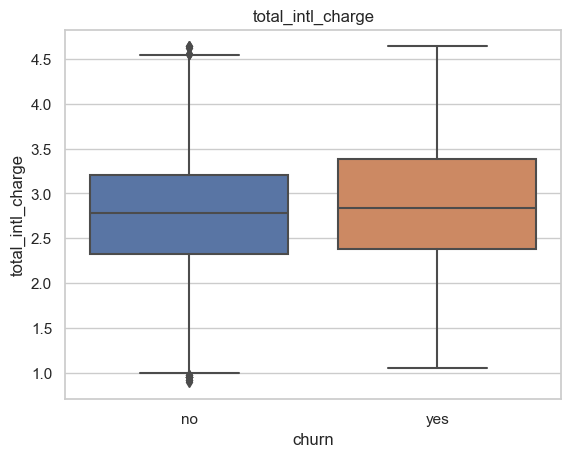

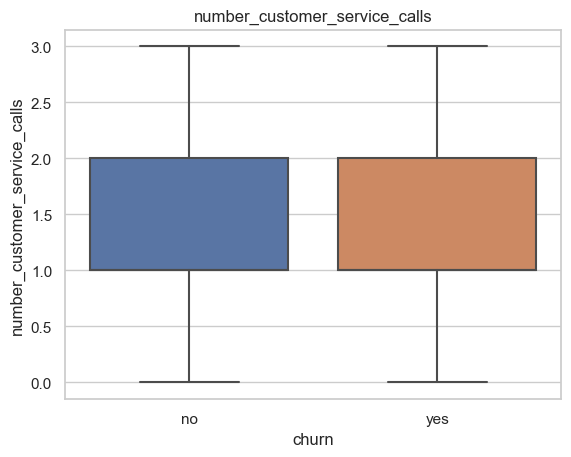

In [39]:
#After removing outliers 

for feature in numerical_variables:
    sns.boxplot(x="churn", y=feature, data=train_eliminate_outliers);
    plt.title(feature);
    plt.show();

In [40]:
train_eliminate_outliers["state"].unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [41]:
train_eliminate_outliers["state"].nunique()

51

### To overcome this problem, Hash Encoder is used.

In [42]:
hash_object=ce.HashingEncoder(cols="state")

train_hash=hash_object.fit_transform(train_eliminate_outliers)
test_hash=hash_object.fit_transform(test)

train_hash.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0,1,0,0,0,0,0,0,137,area_code_415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,0,0,0,0,1,0,0,0,84,area_code_408,...,88,17.06,196.9,89,8.86,6.6,7,1.78,2,no
3,0,0,0,0,1,0,0,0,75,area_code_415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0,0,0,0,1,0,0,0,121,area_code_510,...,108,17.06,212.6,118,9.57,7.5,7,2.03,3,no


In [43]:
### Replacing yes and no to 1 and 0 for categorical feature values

train_hash.international_plan.replace(["no", "yes"], [0, 1], inplace=True)
train_hash.voice_mail_plan.replace(["no", "yes"], [0, 1], inplace=True)
train_hash.churn.replace(["no", "yes"], [0, 1], inplace=True)

test_hash.international_plan.replace(["no", "yes"], [0, 1], inplace=True)
test_hash.voice_mail_plan.replace(["no", "yes"], [0, 1], inplace=True)

train_hash.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,0,1,0,0,0,0,0,0,137,area_code_415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,0,0,0,0,1,0,0,0,84,area_code_408,...,88,17.06,196.9,89,8.86,6.6,7,1.78,2,0
3,0,0,0,0,1,0,0,0,75,area_code_415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,0,0,0,0,1,0,0,0,121,area_code_510,...,108,17.06,212.6,118,9.57,7.5,7,2.03,3,0


In [44]:
train_hash["churn"].unique()

array([0, 1], dtype=int64)

In [45]:
train_hash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   col_0                          4250 non-null   int64  
 1   col_1                          4250 non-null   int64  
 2   col_2                          4250 non-null   int64  
 3   col_3                          4250 non-null   int64  
 4   col_4                          4250 non-null   int64  
 5   col_5                          4250 non-null   int64  
 6   col_6                          4250 non-null   int64  
 7   col_7                          4250 non-null   int64  
 8   account_length                 4250 non-null   int64  
 9   area_code                      4250 non-null   object 
 10  international_plan             4250 non-null   int64  
 11  voice_mail_plan                4250 non-null   int64  
 12  number_vmail_messages          4250 non-null   i

In [46]:
# area_code feature is of type "Object", need to convert to "Numerical".

df_dummies = pd.get_dummies(train_hash["area_code"], dtype = 'uint')
train_data = pd.concat([train_hash,df_dummies ], axis = 1)
del train_data["area_code"]

In [47]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   col_0                          4250 non-null   int64  
 1   col_1                          4250 non-null   int64  
 2   col_2                          4250 non-null   int64  
 3   col_3                          4250 non-null   int64  
 4   col_4                          4250 non-null   int64  
 5   col_5                          4250 non-null   int64  
 6   col_6                          4250 non-null   int64  
 7   col_7                          4250 non-null   int64  
 8   account_length                 4250 non-null   int64  
 9   international_plan             4250 non-null   int64  
 10  voice_mail_plan                4250 non-null   int64  
 11  number_vmail_messages          4250 non-null   int64  
 12  total_day_minutes              4250 non-null   f

In [48]:
# test data 
df_dummies1 = pd.get_dummies(test_hash["area_code"], dtype = 'uint')
test_data = pd.concat([test_hash,df_dummies1 ], axis = 1)
del test_data["area_code"]

In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   col_0                          750 non-null    int64  
 1   col_1                          750 non-null    int64  
 2   col_2                          750 non-null    int64  
 3   col_3                          750 non-null    int64  
 4   col_4                          750 non-null    int64  
 5   col_5                          750 non-null    int64  
 6   col_6                          750 non-null    int64  
 7   col_7                          750 non-null    int64  
 8   id                             750 non-null    int64  
 9   account_length                 750 non-null    int64  
 10  international_plan             750 non-null    int64  
 11  voice_mail_plan                750 non-null    int64  
 12  number_vmail_messages          750 non-null    int

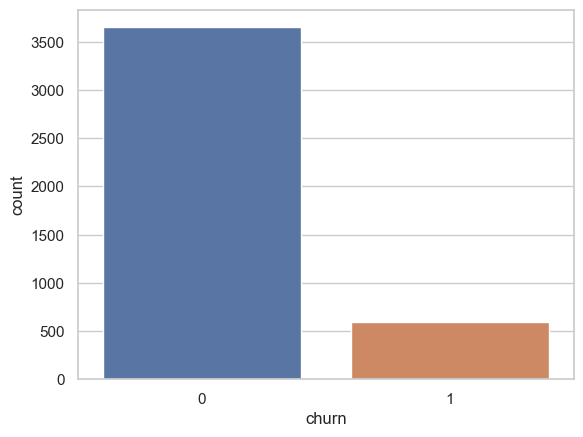

In [50]:
# Now let us handle the dataset with imbalanced classes

sns.countplot(x="churn", data=train_data)
plt.show()


In [77]:
X=train_data.drop("churn", axis=1).values
y=train_data.churn.values

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)

In [78]:
print("Before Upsampling the count of class 0 {}".format(sum(y_train==0)))
print("Before Upsampling the count of class 1 {}".format(sum(y_train==1)))

Before Upsampling the count of class 0 2921
Before Upsampling the count of class 1 479


In [79]:
sm=SMOTE(sampling_strategy=1)
X_train_smote, y_train_smote=sm.fit_resample(X_train, y_train)

print("After Upsampling {}".format(sum(y_train_smote==0)))
print("After Upsampling {}".format(sum(y_train_smote==1)))

After Upsampling 2921
After Upsampling 2921


In [80]:
# Scaling the Dataset using MinMax Scaler

scaler=MinMaxScaler()
X_train_smote_scale=scaler.fit_transform(X_train_smote)
X_test_scale=scaler.fit_transform(X_test)

In [82]:
# random forest classifier model
#testing part
model=RandomForestClassifier(n_jobs=-1)
model.fit(X_train_smote_scale, y_train_smote)

print(accuracy_score(y_test, model.predict(X_test_scale)))
print(classification_report(y_test, model.predict(X_test_scale)))
print(confusion_matrix(y_test, model.predict(X_test_scale)))

0.9235294117647059
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       731
           1       0.92      0.50      0.64       119

    accuracy                           0.92       850
   macro avg       0.92      0.74      0.80       850
weighted avg       0.92      0.92      0.91       850

[[726   5]
 [ 60  59]]


In [85]:
# training accuracy part of random forest classifier

print(accuracy_score(y_train_smote, model.predict(X_train_smote_scale)))
print(classification_report(y_train_smote, model.predict(X_train_smote_scale)))
print(confusion_matrix(y_train_smote, model.predict(X_train_smote_scale)))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2921
           1       1.00      1.00      1.00      2921

    accuracy                           1.00      5842
   macro avg       1.00      1.00      1.00      5842
weighted avg       1.00      1.00      1.00      5842

[[2921    0]
 [   0 2921]]


In [86]:
# DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(X_train_smote_scale, y_train_smote)

print(accuracy_score(y_test, model1.predict(X_test_scale)))
print(classification_report(y_test, model1.predict(X_test_scale)))
print(confusion_matrix(y_test, model1.predict(X_test_scale)))

0.851764705882353
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       731
           1       0.48      0.61      0.54       119

    accuracy                           0.85       850
   macro avg       0.71      0.75      0.72       850
weighted avg       0.87      0.85      0.86       850

[[651  80]
 [ 46  73]]


In [87]:
# training accuracy part of decision tree classifier

print(accuracy_score(y_train_smote, model1.predict(X_train_smote_scale)))
print(classification_report(y_train_smote, model1.predict(X_train_smote_scale)))
print(confusion_matrix(y_train_smote, model1.predict(X_train_smote_scale)))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2921
           1       1.00      1.00      1.00      2921

    accuracy                           1.00      5842
   macro avg       1.00      1.00      1.00      5842
weighted avg       1.00      1.00      1.00      5842

[[2921    0]
 [   0 2921]]


In [88]:
# XGBClassifier
model2=XGBClassifier()
model2.fit(X_train_smote_scale, y_train_smote)

print(accuracy_score(y_test, model2.predict(X_test_scale)))
print(classification_report(y_test, model2.predict(X_test_scale)))
print(confusion_matrix(y_test, model2.predict(X_test_scale)))

0.9317647058823529
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       731
           1       0.91      0.57      0.70       119

    accuracy                           0.93       850
   macro avg       0.92      0.78      0.83       850
weighted avg       0.93      0.93      0.93       850

[[724   7]
 [ 51  68]]


In [89]:
# training accuracy part of XGBClassifier 

print(accuracy_score(y_train_smote, model2.predict(X_train_smote_scale)))
print(classification_report(y_train_smote, model2.predict(X_train_smote_scale)))
print(confusion_matrix(y_train_smote, model2.predict(X_train_smote_scale)))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2921
           1       1.00      1.00      1.00      2921

    accuracy                           1.00      5842
   macro avg       1.00      1.00      1.00      5842
weighted avg       1.00      1.00      1.00      5842

[[2921    0]
 [   0 2921]]


In [90]:
# AdaBoostClassifier
model3=AdaBoostClassifier()
model3.fit(X_train_smote_scale, y_train_smote)

print(accuracy_score(y_test, model3.predict(X_test_scale)))
print(classification_report(y_test, model3.predict(X_test_scale)))
print(confusion_matrix(y_test, model3.predict(X_test_scale)))

0.8764705882352941
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       731
           1       0.59      0.39      0.47       119

    accuracy                           0.88       850
   macro avg       0.75      0.67      0.70       850
weighted avg       0.86      0.88      0.87       850

[[698  33]
 [ 72  47]]


In [91]:
### training accuracy part of AdaBoostClassifier 

print(accuracy_score(y_train_smote, model3.predict(X_train_smote_scale)))
print(classification_report(y_train_smote, model3.predict(X_train_smote_scale)))
print(confusion_matrix(y_train_smote, model3.predict(X_train_smote_scale)))

0.9174940089010613
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2921
           1       0.95      0.88      0.91      2921

    accuracy                           0.92      5842
   macro avg       0.92      0.92      0.92      5842
weighted avg       0.92      0.92      0.92      5842

[[2786  135]
 [ 347 2574]]


In [92]:
# neural networks
import tensorflow as tf
# Adam Optimizer
model4=Sequential()

model4.add(Dense(28, input_dim=X_train_smote_scale.shape[1], activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))

model4.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))
model4.add(Dense(8, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()))
model4.add(Dense(1, activation="sigmoid", kernel_initializer=tf.keras.initializers.GlorotNormal()))

model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model4.fit(X_train_smote_scale, y_train_smote,epochs=100, batch_size=500)

Epoch 1/100
12/12 [==============================] - 3s 9ms/step - loss: 0.6881 - accuracy: 0.5479
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6767 - accuracy: 0.5789
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6656 - accuracy: 0.6096
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6539 - accuracy: 0.6351
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6419 - accuracy: 0.6554
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6288 - accuracy: 0.6662
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6155 - accuracy: 0.6816
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6021 - accuracy: 0.6948
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5886 - accuracy: 0.7081
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5760 - accuracy: 0.7174
Epoch 11/

In [93]:
predictions = model4.predict(X_test_scale)
test1 = [round(x[0]) for x in list(predictions)]
print(accuracy_score(y_test, test1))


27/27 [==============================] - 0s 3ms/step
0.8270588235294117


In [95]:
# SGD Optmizer 
# Batch_size = 500
model6=Sequential()

model6.add(Dense(28, input_dim=X_train_smote_scale.shape[1], activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))

model6.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))
model6.add(Dense(8, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()))
model6.add(Dense(1, activation="sigmoid", kernel_initializer=tf.keras.initializers.GlorotNormal()))

model6.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])
model6.fit(X_train_smote_scale, y_train_smote,epochs=100, batch_size=500)

Epoch 1/100
12/12 [==============================] - 1s 4ms/step - loss: 0.6864 - accuracy: 0.5111
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.5200
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6823 - accuracy: 0.5298
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6805 - accuracy: 0.5402
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6789 - accuracy: 0.5522
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6773 - accuracy: 0.5630
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6757 - accuracy: 0.5700
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6742 - accuracy: 0.5805
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6726 - accuracy: 0.5928
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6711 - accuracy: 0.6084
Epoch 11/

In [96]:
predictions2 = model6.predict(X_test_scale)
test3 = [round(x[0]) for x in list(predictions2)]
print(accuracy_score(y_test, test3))

27/27 [==============================] - 0s 2ms/step
0.7235294117647059


In [97]:
# AdaGrad Optimizer
model7=Sequential()

model7.add(Dense(28, input_dim=X_train_smote_scale.shape[1], activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))

model7.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))
model7.add(Dense(8, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()))
model7.add(Dense(1, activation="sigmoid", kernel_initializer=tf.keras.initializers.GlorotNormal()))

model7.compile(loss="binary_crossentropy", optimizer="Adagrad", metrics=["accuracy"])
model7.fit(X_train_smote_scale, y_train_smote,epochs=100, batch_size=500)

Epoch 1/100
12/12 [==============================] - 1s 4ms/step - loss: 0.8926 - accuracy: 0.4990
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8568 - accuracy: 0.4981
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8326 - accuracy: 0.4964
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8144 - accuracy: 0.4959
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8000 - accuracy: 0.4950
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7882 - accuracy: 0.4928
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7783 - accuracy: 0.4908
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7700 - accuracy: 0.4873
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7628 - accuracy: 0.4849
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7565 - accuracy: 0.4824
Epoch 11/

In [98]:
predictions3 = model7.predict(X_test_scale)
test4 = [round(x[0]) for x in list(predictions3)]
print(accuracy_score(y_test, test4))

27/27 [==============================] - 0s 2ms/step
0.42


In [99]:
# RMSProp Optimizer
model8=Sequential()

model8.add(Dense(28, input_dim=X_train_smote_scale.shape[1], activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))

model8.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))
model8.add(Dense(8, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()))
model8.add(Dense(1, activation="sigmoid", kernel_initializer=tf.keras.initializers.GlorotNormal()))

model8.compile(loss="binary_crossentropy", optimizer="RMSprop", metrics=["accuracy"])
model8.fit(X_train_smote_scale, y_train_smote,epochs=100, batch_size=500)

Epoch 1/100
12/12 [==============================] - 2s 5ms/step - loss: 0.6938 - accuracy: 0.5070
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6717 - accuracy: 0.5741
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.6321
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6306 - accuracy: 0.6811
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6114 - accuracy: 0.7030
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5943 - accuracy: 0.7189
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5761 - accuracy: 0.7224
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5615 - accuracy: 0.7301
Epoch 9/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5505 - accuracy: 0.7408
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5413 - accuracy: 0.7484
Epoch 11/

In [100]:
predictions4 = model8.predict(X_test_scale)
test5 = [round(x[0]) for x in list(predictions4)]
print(accuracy_score(y_test, test5))

27/27 [==============================] - 0s 2ms/step
0.851764705882353


### XGBClassifier model gives best accuracy